<a href="https://colab.research.google.com/github/Nutritiousfacts/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Gabe_Flomo_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [38]:
from math import sqrt

def mean(items):
  return sum(items)/len(items)

def std_dev(items):
  avg = mean(items)
  squares = []
  for i in items:
    squares.append((i-avg)**2)
  
  std = mean(squares)
  std = sqrt(std)
  return std

def variance(items):
  avg = mean(items)
  dist = []
  for i in items:
    dist.append((i-avg)**2)
  
  variance = mean(dist)
  return variance

amounts = [3505,2400,3027,2798,3700,3250,2689]

print("Mean:",mean(amounts))
print("Standard deviation:",std_dev(amounts))
print("Variance:",variance(amounts))
    

Mean: 3052.714285714286
Standard deviation: 428.67360686714756
Variance: 183761.06122448976


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [54]:
import pandas as pd

customers = [127, 80, 105, 92, 120, 115, 93]
fake = {"sales":amounts,"customers": customers}
df = pd.DataFrame(fake)
df.head()


,sales,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120


In [55]:
df.cov()

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [56]:
df.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [42]:
ds = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv")
ds.head()


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [43]:
numeric = ds.drop(["Unnamed: 0","name","sex","cabin","embarked","boat","body","home.dest","has_cabin_number"],axis = 1)
numeric.head()

,pclass,survived,age,sibsp,parch,ticket,fare
0,1.0,1.0,29.0000,0.0,0.0,24160,211.3375
1,1.0,1.0,0.9167,1.0,2.0,113781,151.5500
2,1.0,0.0,2.0000,1.0,2.0,113781,151.5500
3,1.0,0.0,30.0000,1.0,2.0,113781,151.5500
4,1.0,0.0,25.0000,1.0,2.0,113781,151.5500


In [44]:
numeric.cov()

,pclass,survived,age,sibsp,parch,fare
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

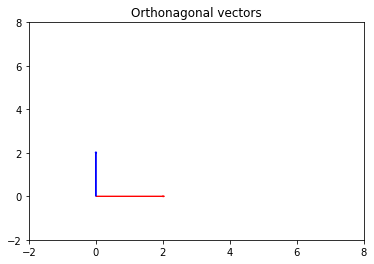

In [45]:
import matplotlib.pyplot as plt
vec1 = [2,0]
vec2 = [0,2]

plt.arrow(0,0,vec1[0],vec1[1],head_width = .05,head_length = .05,color = "r")
plt.arrow(0,0,vec2[0],vec2[1],head_width = .05,head_length = .05,color = "b")
plt.xlim(-2,8)
plt.ylim(-2,8)
plt.title("Orthonagonal vectors")
plt.show()


## a synonym for orthogonal is perpindicular

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
#no because their dot product isnt 0

In [47]:
def dot(lst1,lst2):
  x = len(lst1)
  prod = []
  for i in range(x):
    prod.append(lst1[i] * lst2[i])
  
  dot = sum(prod)
  return dot

a = [-5,3,7]
b = [6,-8,2]
dot(a,b)

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [48]:
from math import sqrt
import numpy as np

x = 4 + (15**2) + 36 + 400
xlist = np.array([2,-15,6,20])
print(dot(xlist,xlist))
print(xlist.T * xlist)
sqrt(x)


665
[  4 225  36 400]


25.787593916455254

In [0]:
def norm(lst):
  sqre = [x**2 for x in lst]
  sqre = sum(sqre)
  norm = sqrt(sqre)
  return norm



# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

d = 7i + 12j

e = 2i + 11j - 8k

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [50]:
f=[4,12,11,9,2]
norm = norm(f)
norm

unit = [4/19.13, 12/19.13, 11/19.13, 9/19.13, 2/19.13]
unit

[0.20909566126502876,
 0.6272869837950863,
 0.575013068478829,
 0.4704652378463147,
 0.10454783063251438]

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

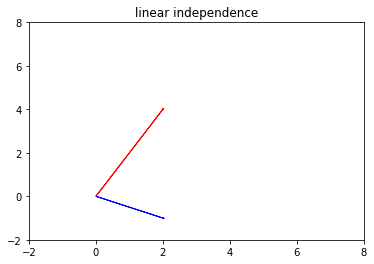

In [53]:

a = [2,4]
b = [2,-1]

plt.arrow(0,0,a[0],a[1],head_width = .05,head_length = .05,color = "r")
plt.arrow(0,0,b[0],b[1],head_width = .05,head_length = .05,color = "b")
plt.xlim(-2,8)
plt.ylim(-2,8)
plt.title("linear independence")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

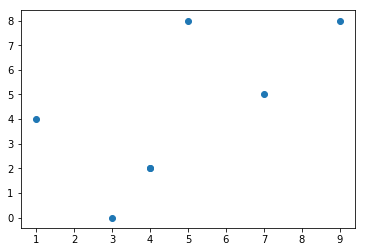

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()